In [1]:
import pandas as pd
from src.config.params import CSV_FILE

annotations = pd.read_csv(CSV_FILE)

In [2]:
annotations.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,barcode_002_png.rf.9f8b603beddfa6ad17249aac93f...,680,370,Strichcode,68,43,610,147
1,barcode_002_png.rf.9f8b603beddfa6ad17249aac93f...,680,370,3,61,164,134,271
2,barcode_002_png.rf.9f8b603beddfa6ad17249aac93f...,680,370,7,214,164,284,272
3,barcode_002_png.rf.9f8b603beddfa6ad17249aac93f...,680,370,2,137,164,208,271
4,barcode_002_png.rf.9f8b603beddfa6ad17249aac93f...,680,370,7,362,164,434,274


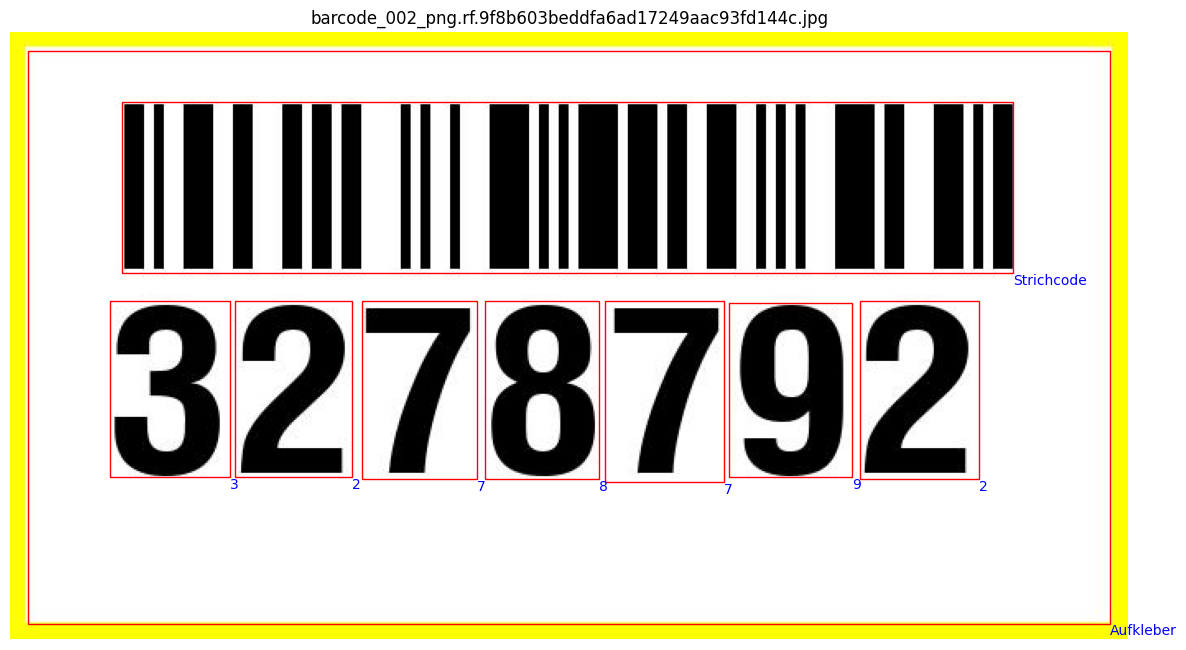

In [43]:
from src.plotting.plot_barcodes import plot_single_barcode_bounding_boxes
df = pd.DataFrame(annotations)
plot_single_barcode_bounding_boxes(df, df['filename'][0])

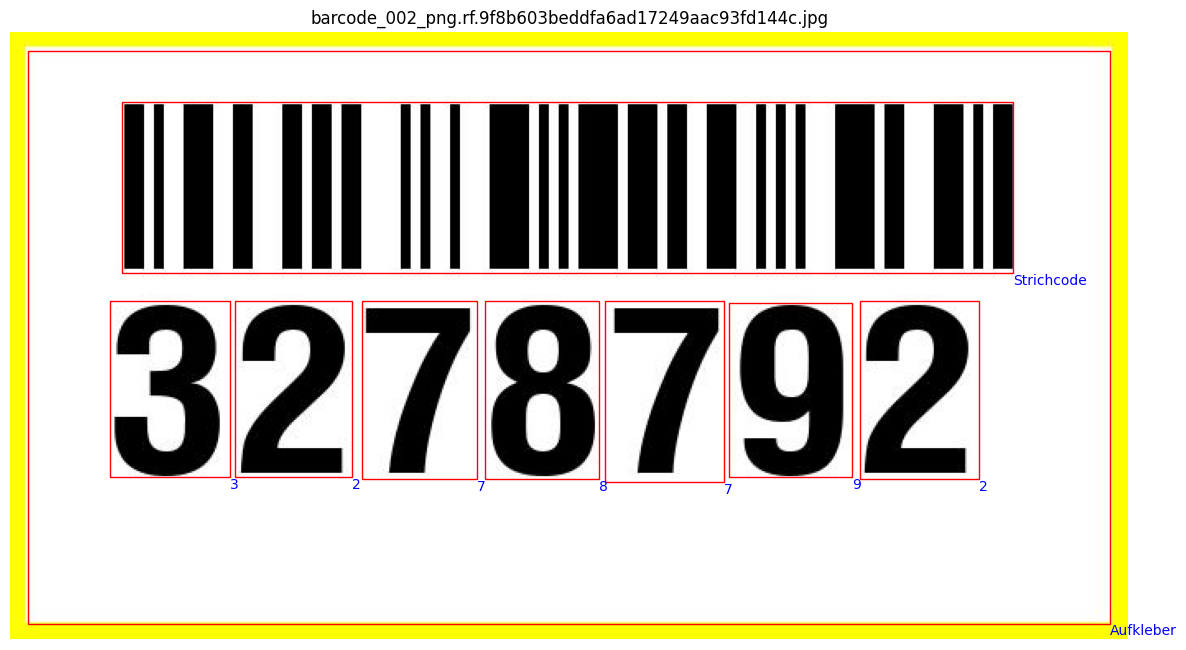

In [24]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from src.config.params import IMAGE_DIRECTORY
import os
from PIL import Image

df = pd.DataFrame(annotations)

# Load the image
image_path = os.path.join(IMAGE_DIRECTORY, df['filename'][0])
image = Image.open(image_path)

# Plotting the image with all bounding boxes for the specific filename
fig, ax = plt.subplots(figsize=(12, 8))
ax.imshow(image)

# Filter rows for the specific filename
filtered_df = df[df['filename'] == df['filename'][0]]

for i, row in filtered_df.iterrows():
    rect = patches.Rectangle((row['xmin'], row['ymin']), 
                             row['xmax'] - row['xmin'], 
                             row['ymax'] - row['ymin'], 
                             linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    ax.text(row['xmax'], row['ymax'], row['class'], color='blue', verticalalignment='top')

ax.set_xlim(0, df['width'][0])
ax.set_ylim(df['height'][0], 0)  # Invert y-axis to match image coordinate system
ax.set_title(df['filename'][0])
ax.axis('off')

plt.tight_layout()
plt.show()